In [1]:
!pip install catboost xgboost lightgbm

#Standard Imports
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Metrics Import
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.8 MB/s eta 0:00:00


In [4]:
df = pd.read_csv(r"Module_7_Data.csv", delim_whitespace=True,skipinitialspace=True)
df.drop(columns=['P[Pa]'], inplace=True)
correct_columns = ["Depth_km", "Vp_km_s", "Vs_km_s", "Rho_g_cm3", "T_K", "g_m_s2", "P_Pa"]
df.columns = correct_columns

In [5]:
df.sample(5)

,Depth_km,Vp_km_s,Vs_km_s,Rho_g_cm3,T_K,g_m_s2,P_Pa
13309,212.918,7.8449,4.3726,3.5084,1125.9253,3.6360,2.531319e+09
13408,2069.419,5.4650,0.0000,6.6602,NaN,2.5127,2.743444e+10
5033,951.922,8.2107,4.3400,3.6656,2094.1307,3.2434,1.153404e+10
12317,602.760,7.7982,4.2076,3.5339,2019.8046,3.4091,7.340811e+09
1942,423.030,7.6252,4.1725,3.4800,1901.2354,3.5045,5.163129e+09


In [6]:
df.shape

(14600, 7)

In [7]:
df.describe()

,Depth_km,Vp_km_s,Vs_km_s,Rho_g_cm3,T_K,g_m_s2,P_Pa
count,14600.000000,14600.000000,14600.000000,14600.000000,10600.000000,14600.000000,1.460000e+04
mean,1127.876865,7.349065,3.155397,4.250010,1649.507858,3.027847,1.404799e+10
std,895.083724,1.360816,1.974401,1.343407,598.993093,0.838039,1.149289e+10
min,0.000000,3.100600,0.000000,1.425200,273.150000,-2.337100,0.000000e+00
25%,340.170250,6.044525,0.000000,3.494675,1210.123875,3.103300,4.138887e+09
50%,1008.183000,7.784300,4.272200,3.664450,1975.831450,3.228000,1.217662e+10
75%,1606.339000,8.181525,4.441200,4.034900,2098.343600,3.552425,1.943311e+10
max,3389.500000,9.410300,4.957100,7.152000,2285.050600,3.752100,4.142276e+10


In [8]:
mars_radius = 3390
df['Depth_km'] = mars_radius- df['Depth_km']

In [9]:
df.rename(columns={"Vp_km_s": "Vp", "Vs_km_s": "Vs","Rho_g_cm3": "Density"}, inplace=True)

In [10]:
df.head(5)

,Depth_km,Vp,Vs,Density,T_K,g_m_s2,P_Pa
0,3390.000,3.5908,2.1422,1.6214,273.1500,3.7291,0.000000e+00
1,3379.418,3.5908,2.1422,1.6214,312.1719,3.7380,6.398580e+07
2,3379.418,5.2038,3.1045,2.3498,312.1719,3.7380,6.398580e+07
3,3360.974,5.2038,3.1045,2.3498,380.1873,3.7426,2.259863e+08
4,3360.974,6.5199,3.8897,2.9441,380.1873,3.7426,2.259863e+08


In [11]:
# Checking for Null Values
df.isnull().sum()

,0
Depth_km,0
Vp,0
Vs,0
Density,0
T_K,4000
g_m_s2,0
P_Pa,0


In [12]:
df.drop(columns=['T_K',	'g_m_s2',	'P_Pa'],inplace=True)


In [13]:
df.isnull().sum()

,0
Depth_km,0
Vp,0
Vs,0
Density,0


In [14]:
X = df[['Vp','Vs','Density']]
y=df['Depth_km']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
rf = RandomForestRegressor(random_state=42)

# Hyperparameter Tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_


y_pred = best_rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
score=r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {score}")

Mean Squared Error: 5838.349238936199
Root Mean Squared Error: 76.40909133693582
R2 Score: 0.9931242009821889


In [16]:

adaboost = AdaBoostRegressor( random_state=42)


param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1, 2],
    'loss': ['linear', 'square', 'exponential']
}

# Hyperparameter Tuning
grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid, cv=5,
                           scoring='neg_mean_squared_error', n_jobs=-1)


grid_search.fit(X_train, y_train)

# Fetching the best parameters and model
best_params = grid_search.best_params_
best_adaboost = grid_search.best_estimator_

# Predictions
y_pred = best_adaboost.predict(X_test)

# Metric Calculation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 15336.274782388706
Root Mean Squared Error: 123.83971407585172
R2 Score: 0.9819385345463091


In [17]:

lgbm = LGBMRegressor(random_state=42)


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [-1, 5, 10, 20],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [20, 31, 50],
    'min_child_samples': [10, 20, 30],

}

# Hyperparameter Tuning
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=5,
                           scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)

# Fetching best parameters and model
best_params = grid_search.best_params_
best_lgbm = grid_search.best_estimator_

# Predictions
y_pred = best_lgbm.predict(X_test)

# Metric Calculations
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {r2}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000729 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 11680, number of used features: 3
[LightGBM] [Info] Start training from score 2265.510472
Mean Squared Error: 5961.99343856534
Root Mean Squared Error: 77.21394588133246
R2 Score: 0.9929785857352115


In [18]:
# Generate predictions from pre-trained models
rf_preds_train = best_rf.predict(X_train)  # Predictions from Random Forest
ab_preds_train = best_adaboost.predict(X_train)  # Predictions from AdaBoost
lgbm_preds_train = best_lgbm.predict(X_train)  # Predictions from LightGBM

rf_preds_test = best_rf.predict(X_test)  # Predictions for test set
ab_preds_test = best_adaboost.predict(X_test)
lgbm_preds_test = best_lgbm.predict(X_test)

# Stack predictions to create a new training dataset
stacked_train = np.column_stack((rf_preds_train, ab_preds_train, lgbm_preds_train))
stacked_test = np.column_stack((rf_preds_test, ab_preds_test, lgbm_preds_test))

# Train the meta-model
meta_model = LinearRegression()
meta_model.fit(stacked_train, y_train)

# Make predictions with the meta-model
stacked_preds = meta_model.predict(stacked_test)

# Evaluate the stacked model
mse = mean_squared_error(y_test, stacked_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, stacked_preds)

# Display results
print(f"Mean Squared Error (Stacked): {mse}")
print(f"Root Mean Squared Error (Stacked): {rmse}")
print(f"R2 Score (Stacked): {r2}")


Mean Squared Error (Stacked): 7276.362280172201
Root Mean Squared Error (Stacked): 85.30159600014645
R2 Score (Stacked): 0.9914306591518047


In [19]:
stacked_preds.reshape(-1,1)

array([[3180.2772559 ],
       [3309.88755062],
       [2036.06394682],
       ...,
       [1869.80256565],
       [2366.58037409],
       [3210.91031363]])

In [36]:

#Function to find the x coordinate where the big jump occurs
def find_major_jump(x_values, y_values):
    """Find the single largest jump in y values."""
    diff_array = np.abs(np.diff(y_values))
    major_jump_idx = np.argmax(diff_array)
    return x_values[major_jump_idx], major_jump_idx
find_major_jump(stacked_preds, X_test['Vs'])

(1818.7194892880034, 1260)

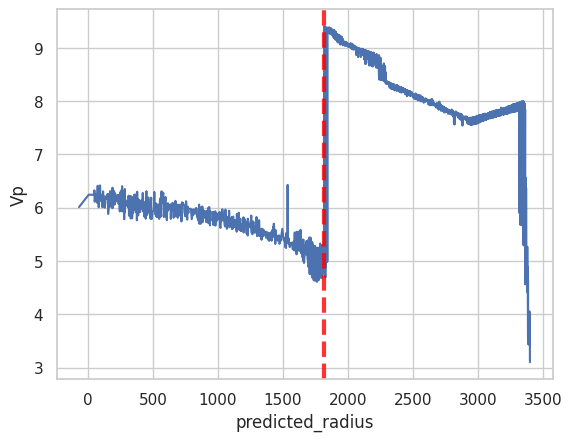

In [37]:
#Plot of P Wave Velocity and the Predicted Depth by the Model
sns.set_theme(style="whitegrid")
sns.lineplot( x=stacked_preds, y=X_test['Vp'])
plt.xlabel("predicted_radius")
#The x value is set in accordance with the output from the major jump
plt.axvline(x=1818.7194892880034, color='red', linestyle='--', linewidth=3, alpha=0.8, label='Transition Point')


From the graph between P wave Velocity and the Predicted Depth the Core Radius is around **1800km**

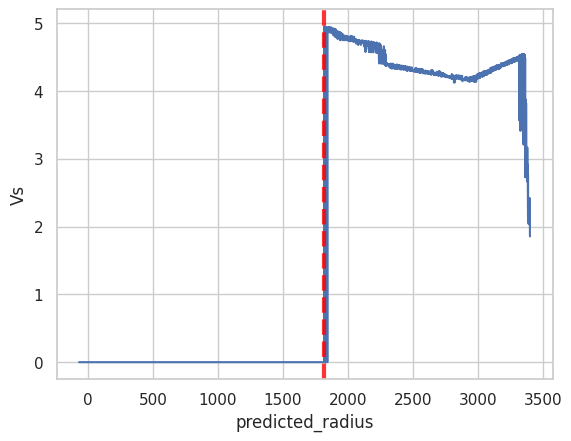

In [38]:
#Plot of S Wave Velocity and the Predicted Depth by the Model
sns.set_theme(style="whitegrid")
sns.lineplot( x=stacked_preds, y=X_test['Vs'])
plt.xlabel("predicted_radius")
#The x value is set in accordance with the output from the major jump
plt.axvline(x=1818.7194892880034, color='red', linestyle='--', linewidth=3, alpha=0.8, label='Transition Point')


From the graph between S wave Velocity and the Predicted Depth the Core Radius is around **1800km**

array([3180.2772559 , 3309.88755062, 2036.06394682, ..., 1869.80256565,
       2366.58037409, 3210.91031363])